In [1]:
%load_ext autoreload
%autoreload 2

## Read data

In [2]:
import pandas as pd
import torch

In [3]:
raw_data = pd.read_excel('./data/24h-2-new.xlsx')
raw_data.head()

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Density current,# VNF Receive current,# VNF Density future,# VNF Receive future
0,0.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2.0,0.328,24.600000,0.080,0.008000,0.600000,2.400000,2.400000,4.0,1.0,1.0,0.0,4.0,0.0,14.0
2,4.0,1.148,24.600000,0.280,0.028000,0.600000,8.400000,8.400000,14.0,1.0,1.0,0.0,14.0,0.0,73.0
3,6.0,5.986,26.026087,1.460,0.146000,0.634783,14.600000,10.950000,69.0,3.0,4.0,0.0,73.0,880.0,1473.0
4,8.0,79.746,79.746000,52.598,53.505633,53.505633,947.836316,608.008333,300.0,19.0,30.0,880.0,1473.0,1492.0,1847.0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    raw_data.drop(columns='# VNF Density current'),
    raw_data['# VNF Density current'],
    test_size=0.25, random_state=42, shuffle=False)

X_train.head()

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Receive current,# VNF Density future,# VNF Receive future
0,0.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.0
1,2.0,0.328,24.600000,0.080,0.008000,0.600000,2.400000,2.400000,4.0,1.0,1.0,4.0,0.0,14.0
2,4.0,1.148,24.600000,0.280,0.028000,0.600000,8.400000,8.400000,14.0,1.0,1.0,14.0,0.0,73.0
3,6.0,5.986,26.026087,1.460,0.146000,0.634783,14.600000,10.950000,69.0,3.0,4.0,73.0,880.0,1473.0
4,8.0,79.746,79.746000,52.598,53.505633,53.505633,947.836316,608.008333,300.0,19.0,30.0,1473.0,1492.0,1847.0


In [5]:
torch.Tensor(X_train.iloc[0].values)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4.])

In [6]:
X_train.columns

Index(['Time ', 'CPU edge average (1)', 'CPU edge average (2)',
       'CPU server average', 'BW edge (1)', 'BW edge (1).1', 'BW server (1)',
       'BW server (2)', '# edge device', '# links (1)', '# links (2)',
       '# VNF Receive current', '# VNF Density future',
       '# VNF Receive future'],
      dtype='object')

## Model

In [7]:
seq_len = 4

In [8]:
from fil_lstm import FILDataset
train_dataset = FILDataset(X_train, Y_train, sequence_length=seq_len)
test_dataset = FILDataset(X_test, Y_test, sequence_length=seq_len)

In [9]:
from fil_lstm import Model
model = Model(input_size=11, hidden_size=100, num_layers=1, dropout=0.5, sequence_length=seq_len)

/Users/nghiadanh/miniforge3/envs/tf_m1/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [10]:
model.train(train_dataset, test_dataset, epochs=100, batch_size=20, lr=0.001)

Epoch: 0 	 Train loss:  (946.4218139920487, -1.0001327636483937) 	 Test loss:  (1004.8287789469408, -1.136604124800408)
Epoch: 5 	 Train loss:  (154.68881943881723, 0.9465672836065955) 	 Test loss:  (172.85181514812044, 0.9367751482687623)
Epoch: 10 	 Train loss:  (42.78847695075889, 0.9959116976148323) 	 Test loss:  (46.8892035772562, 0.9953475081218646)
Epoch: 15 	 Train loss:  (25.745596796239376, 0.998519885565264) 	 Test loss:  (26.96645164199688, 0.9984611810822193)
Epoch: 20 	 Train loss:  (18.743583700339716, 0.9992154968737753) 	 Test loss:  (19.889588573989613, 0.9991628726271189)
Epoch: 25 	 Train loss:  (16.2613269942903, 0.9994095252335595) 	 Test loss:  (17.11301955332319, 0.9993802833001979)
Epoch: 30 	 Train loss:  (15.134326423852201, 0.9994885354190942) 	 Test loss:  (15.777161927957023, 0.9994732583182052)
Epoch: 35 	 Train loss:  (14.503015664988652, 0.9995303157137317) 	 Test loss:  (15.03368258074104, 0.9995217327460987)
Epoch: 40 	 Train loss:  (13.77070916947538

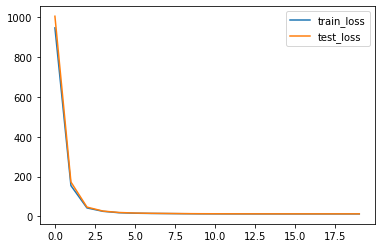

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(model.losses)[:,0], label='train_loss')
plt.plot(np.array(model.losses)[:,1], label='test_loss')
plt.legend()
plt.show()

In [12]:
np.array(model.losses).shape

(20, 2)

In [13]:
# torch.save(model.state_dict(), './model/best_2')
# torch.save(model, './model/best_2_full')

In [14]:
# Save as TorchScript
x_test = torch.zeros((1,seq_len,11))
traced_model = torch.jit.trace(model, (x_test, model.init_state()))
traced_model.save('./model/torch_script/model_script_2.zip')

In [15]:
traced_model.code

'def forward(self,\n    x: Tensor,\n    prev_state: Tuple[Tensor, Tensor]) -> Tuple[Tensor, Tuple[Tensor, Tensor]]:\n  relu = self.relu\n  fc = self.fc\n  relu1 = self.relu1\n  fc1 = self.fc1\n  lstm = self.lstm\n  hx, hx0, = prev_state\n  _0, _1, _2, = (lstm).forward(x, hx, hx0, )\n  _3 = (relu1).forward((fc1).forward(_0, ), )\n  _4 = torch.slice((relu).forward((fc).forward(_3, ), ), 0, 0, 9223372036854775807)\n  _5 = torch.slice(torch.select(_4, 1, -1), 1, 0, 9223372036854775807)\n  return (_5, (_1, _2))\n'

In [16]:
loaded_model = torch.load('./model/best_2_full')

In [17]:
loaded_model.evaluate(train_dataset, batch_size=len(X_train))

(11.491956468615886, 0.9997050982287355)

In [18]:
loaded_model.evaluate(test_dataset, batch_size=len(X_test))

(11.586650638664347, 0.9997159101093859)